In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# TODO: Add quicksort when fixed
sort_algos = ["SelectionSort", "InsertionSort", "MergeSort", "CountingSort", "NativeSort", "HeapSort", "QuickSort"]

# Load data

In [3]:
data={}
for x in sort_algos:
        data[x]=pd.read_csv("./data/" + x + ".csv")

### Run this cell to visualize all the raw data

In [4]:
for algo, df in data.items():
    print(algo)
    print(df.head(),"\n")

SelectionSort
   power     start_time      stop_time
0      1  1569948367672  1569948367682
1      2  1569948367685  1569948367686
2      3  1569948367687  1569948367689
3      4  1569948367689  1569948367693
4      5  1569948367693  1569948367697 

InsertionSort
   power     start_time      stop_time
0      1  1569948848980  1569948848983
1      2  1569948848983  1569948848984
2      3  1569948848984  1569948848984
3      4  1569948848985  1569948848985
4      5  1569948848986  1569948848987 

MergeSort
   power     start_time      stop_time
0      1  1569948955756  1569948955760
1      2  1569948955760  1569948955761
2      3  1569948955762  1569948955764
3      4  1569948955764  1569948955767
4      5  1569948955768  1569948955775 

CountingSort
   power     start_time      stop_time
0      1  1569948959669  1569948959683
1      2  1569948959683  1569948959687
2      3  1569948959688  1569948959693
3      4  1569948959693  1569948959699
4      5  1569948959700  1569948959706 

Nativ

### Run the next 2 cells to see first dataframe and quick metrics about it

In [5]:
data[sort_algos[0]].head()

,power,start_time,stop_time
0,1,1569948367672,1569948367682
1,2,1569948367685,1569948367686
2,3,1569948367687,1569948367689
3,4,1569948367689,1569948367693
4,5,1569948367693,1569948367697


In [6]:
data[sort_algos[0]].describe()

,power,start_time,stop_time
count,15.000000,1.500000e+01,1.500000e+01
mean,8.000000,1.569948e+12,1.569948e+12
std,4.472136,3.079952e+04,1.251446e+05
min,1.000000,1.569948e+12,1.569948e+12
25%,4.500000,1.569948e+12,1.569948e+12
50%,8.000000,1.569948e+12,1.569948e+12
75%,11.500000,1.569948e+12,1.569948e+12
max,15.000000,1.569948e+12,1.569949e+12


# Creating the new features

- running time in miliseconds<br>
...

In [7]:
for algo, df in data.items():
    df["run_time"] = df.loc[:,"stop_time"] - df.loc[:,"start_time"]


In [8]:
data[sort_algos[0]]

,power,start_time,stop_time,run_time
0,1,1569948367672,1569948367682,10
1,2,1569948367685,1569948367686,1
2,3,1569948367687,1569948367689,2
3,4,1569948367689,1569948367693,4
4,5,1569948367693,1569948367697,4
5,6,1569948367699,1569948367706,7
6,7,1569948367708,1569948367721,13
7,8,1569948367728,1569948367761,33
8,9,1569948367766,1569948367874,108
9,10,1569948367884,1569948368295,411


# Plotting runtime for each sort

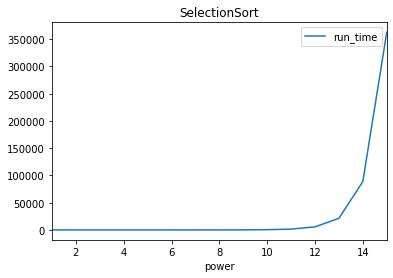

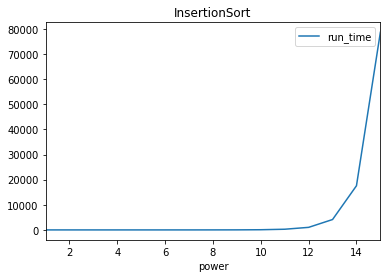

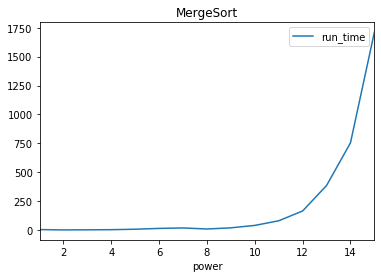

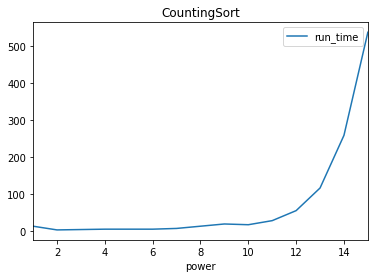

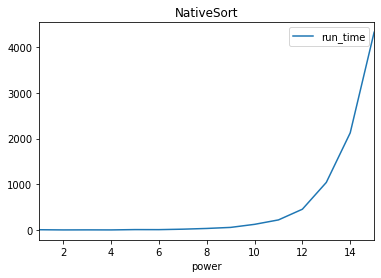

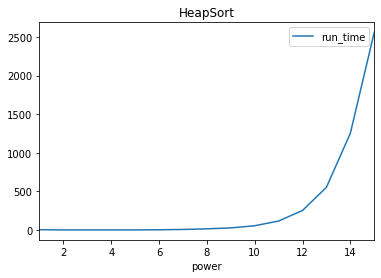

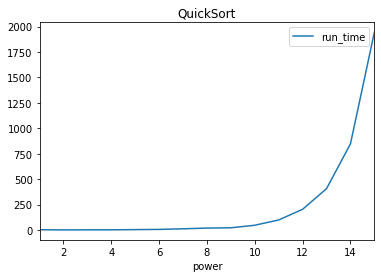

In [9]:
# INDIVIDUAL PLOT
for algo, df in data.items():
    # simply plotting without the log add param `logx = True` or `logy = True` for log on x or y axis to the plot function
    # check pandas dataframe.plot() for more details
    df.plot(x='power', y='run_time', title=algo)
plt.show()

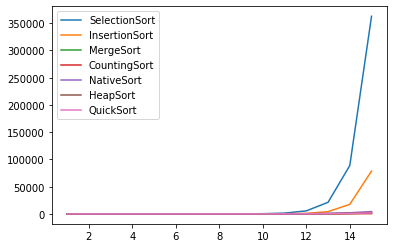

In [10]:
# GROUPED PLOT
fig = plt.figure()

for algo, df in data.items():
    plt.plot(df.loc[:,"power"], df.loc[:,"run_time"], label=algo)

plt.legend()
plt.show()

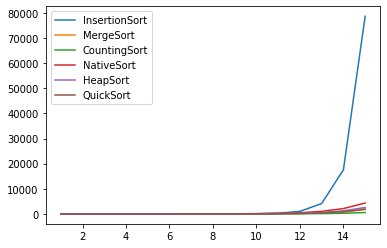

In [11]:
# GROUPED PLOT
fig = plt.figure()

for algo, df in data.items():
    if algo is not "SelectionSort":
        plt.plot(df.loc[:,"power"], df.loc[:,"run_time"], label=algo)

plt.legend()
plt.show()

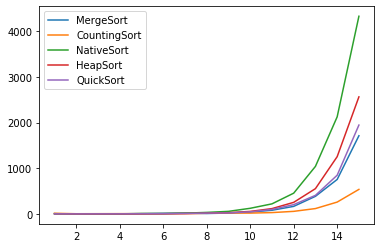

In [12]:
# GROUPED PLOT
fig = plt.figure()

for algo, df in data.items():
    if algo not in ["SelectionSort", "InsertionSort"]:
        plt.plot(df.loc[:,"power"], df.loc[:,"run_time"], label=algo)

plt.legend()
plt.show()

# Computing the coeff

In [13]:
for algo, df in data.items():
    df["elements"] = df.loc[:,"power"].apply(lambda x: np.power(2,x))


In [14]:
data[sort_algos[0]]

,power,start_time,stop_time,run_time,elements
0,1,1569948367672,1569948367682,10,2
1,2,1569948367685,1569948367686,1,4
2,3,1569948367687,1569948367689,2,8
3,4,1569948367689,1569948367693,4,16
4,5,1569948367693,1569948367697,4,32
5,6,1569948367699,1569948367706,7,64
6,7,1569948367708,1569948367721,13,128
7,8,1569948367728,1569948367761,33,256
8,9,1569948367766,1569948367874,108,512
9,10,1569948367884,1569948368295,411,1024


In [15]:
for algo, df in data.items():
    print(algo)
    cov = df.loc[:,['run_time','elements']].cov().iloc[1][0]
    print(cov)
    a = cov/df["elements"].var()
    b = df["run_time"].mean() - df["elements"].mean()*a
    print("a: " + str(a) + ", b: " + str(b),'\n')

SelectionSort
817495486.8571428
a: 9.992592559524246, b: -11620.97071972413 

InsertionSort
175648974.8285714
a: 2.147031594887279, b: -2596.6379026228624 

MergeSort
4174047.295238095
a: 0.05102114276599942, b: -8.774638001800412 

CountingSort
1308548.7333333332
a: 0.0159949437601807, b: 3.385823708021192 

NativeSort
10772636.304761905
a: 0.13167848277581476, b: -14.02784601534961 

HeapSort
6368705.3904761905
a: 0.0778473754556585, b: -16.643326874074944 

QuickSort
4733908.961904761
a: 0.05786456834404644, b: -12.339774790582652 

